# Prediction of House Prices

### Objective:
In this project we will try to build a keras model(Linear Regression Model) to predict the price of houses in King County, USA based on different features.

### Data
We will be using the dataset House Sales in King County, USA from Kaggle.com:  
https://www.kaggle.com/harlfoxem/housesalesprediction

#### Features
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/DK/OneDrive/Desktop/Data Science/udemy/TensorFlow_FILES/DATA/kc_house_data.csv', parse_dates = True)

## EDA

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


#### Let's check how the price is varying with respect to features of the house.

<AxesSubplot:xlabel='price', ylabel='Density'>

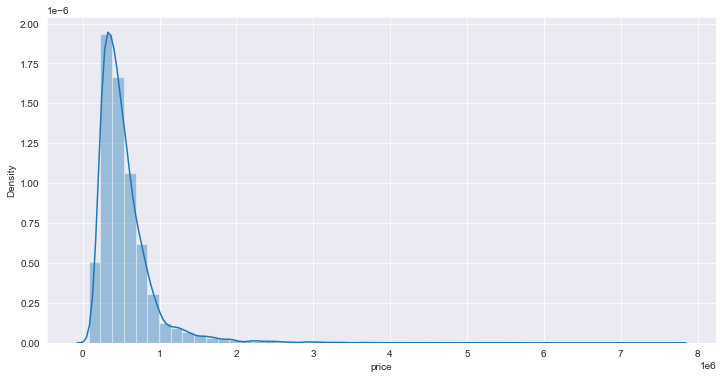

In [5]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,6))
sns.distplot(df['price'])

#### Here we will check what is the most preffered number of bedrooms

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

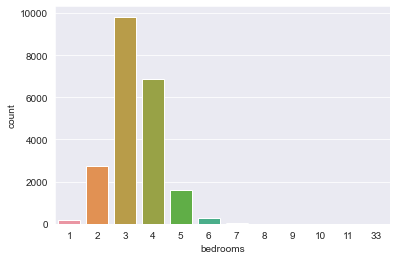

In [6]:
sns.countplot(df['bedrooms'])

Most of the houses have 3-4 bedrooms.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

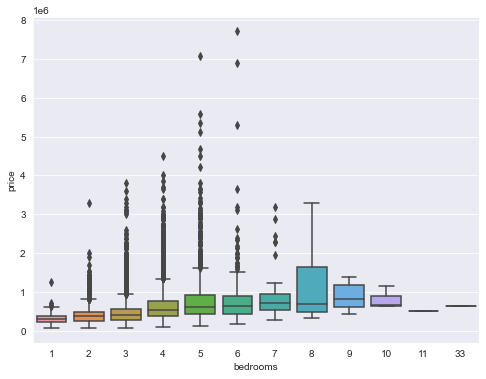

In [7]:
plt.figure(figsize = (8,6))
sns.boxplot(x='bedrooms', y = 'price', data = df)

#### Here we wish to know what is preffered number of bathrooms

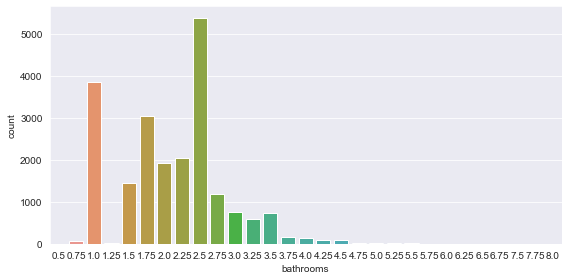

In [8]:
plt.figure(figsize = (8,4))
sns.countplot(df['bathrooms'])
plt.tight_layout()

Majority of houses have 2.5 bedrooms.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

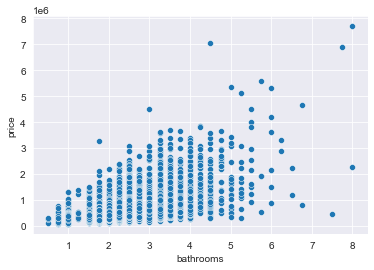

In [9]:
sns.scatterplot(x='bathrooms', y = 'price', data = df)

#### How the price varies with the area of living space and land area.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

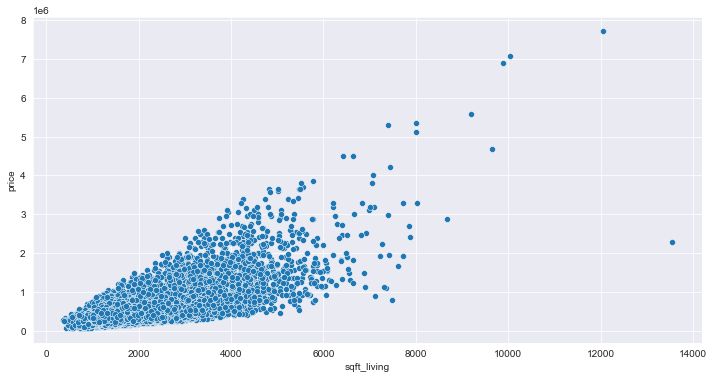

In [10]:
plt.figure(figsize = (12,6))
sns.scatterplot(x= 'sqft_living', y = 'price', data = df)

Price of houses incrreses linearly with area of interior living space, which is expected. 

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

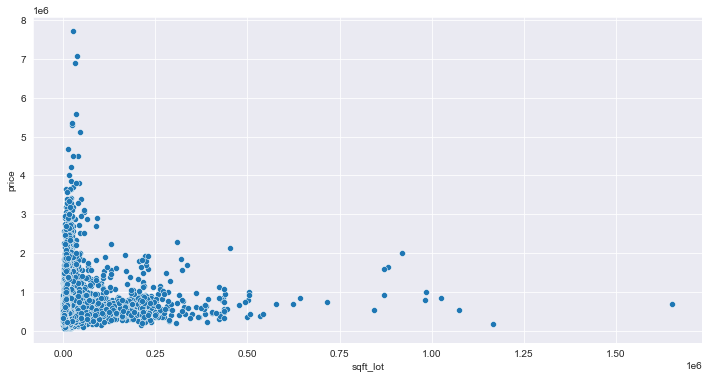

In [11]:
plt.figure(figsize = (12,6))
sns.scatterplot(x= 'sqft_lot', y = 'price', data = df)

People tend to buy houses with land area less than 25,000 square feet. Prices are lesser for higher land area which quite unusual.  

<AxesSubplot:xlabel='floors', ylabel='count'>

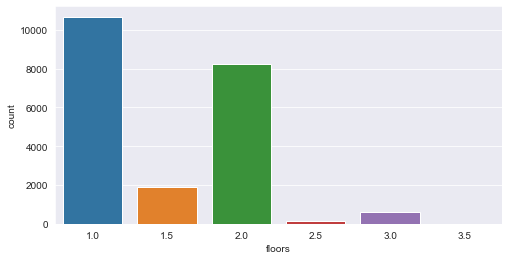

In [12]:
plt.figure(figsize = (8,4))
sns.countplot(df['floors'])

Majority of houses have 1 and 2 floors.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

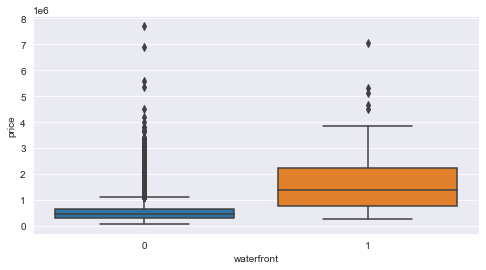

In [13]:
plt.figure(figsize = (8,4))
sns.boxplot('waterfront', 'price', data = df)

Houses with waterfront overlook have higher prices.

<AxesSubplot:xlabel='view', ylabel='price'>

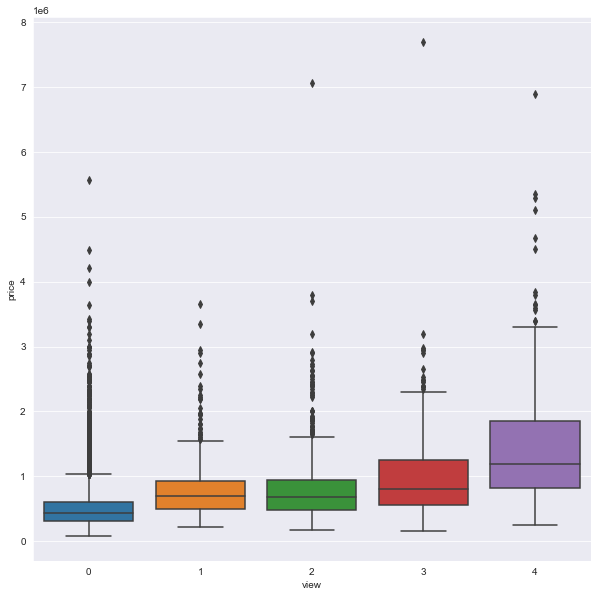

In [14]:
plt.figure(figsize = (10,10))
sns.boxplot('view', 'price', data = df)

People are willing to pay more for a better of house.

<AxesSubplot:xlabel='condition', ylabel='price'>

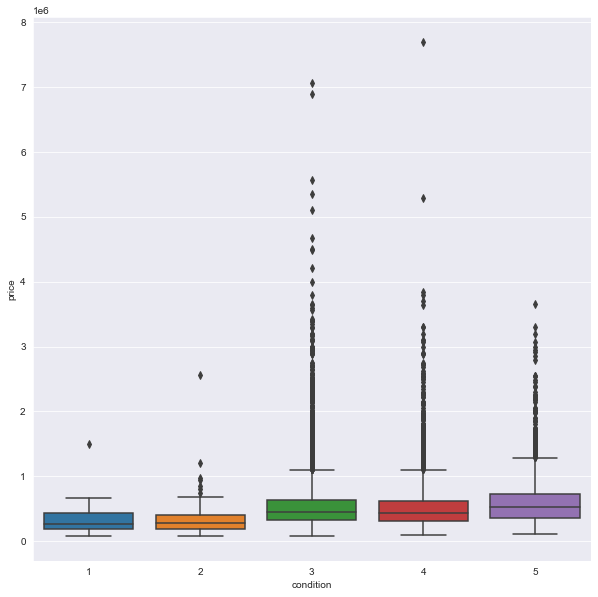

In [15]:
plt.figure(figsize = (10,10))
sns.boxplot('condition', 'price', data = df)

Looking at the plot above we may infer that people are willing to pay high for an average conditioned house.

<AxesSubplot:xlabel='grade', ylabel='price'>

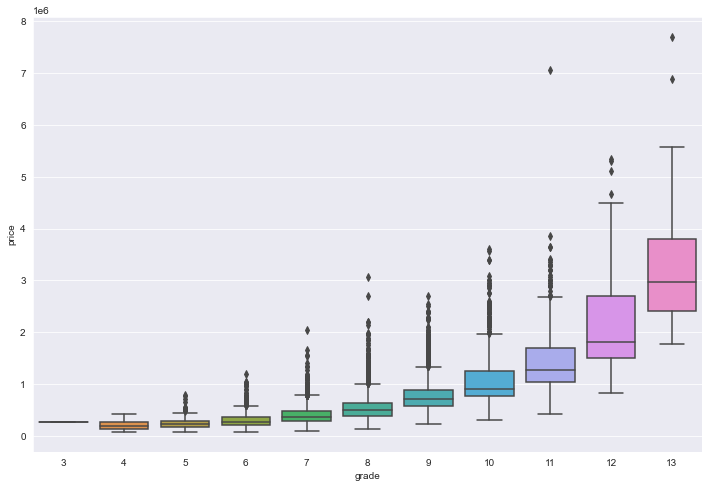

In [16]:
plt.figure(figsize = (12,8))
sns.boxplot('grade', 'price', data = df)

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

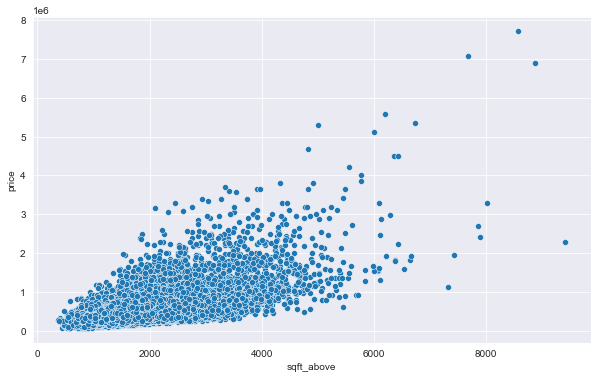

In [17]:
plt.figure(figsize = (10,6))
sns.scatterplot('sqft_above', 'price', data = df)

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

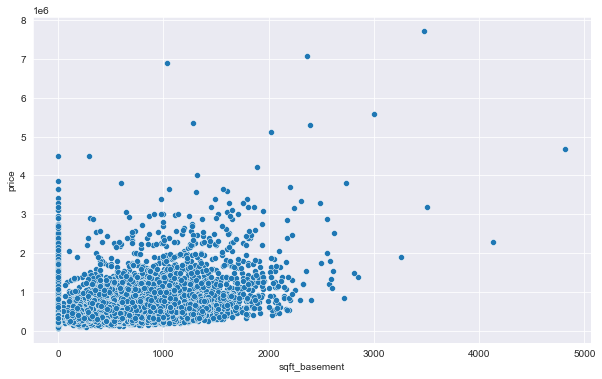

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot('sqft_basement', 'price', data = df)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

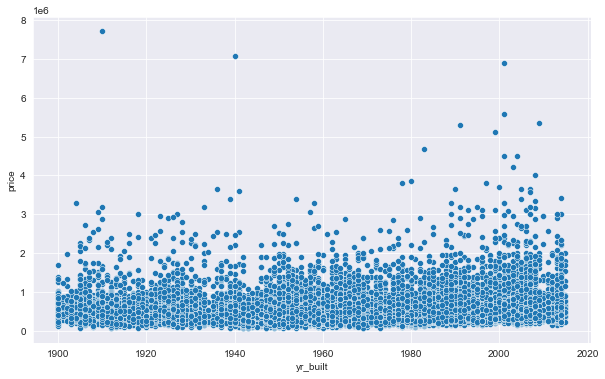

In [19]:
plt.figure(figsize = (10,6))
sns.scatterplot('yr_built', 'price', data = df)

##  Geographical Properties

### Latitude

<AxesSubplot:xlabel='price', ylabel='lat'>

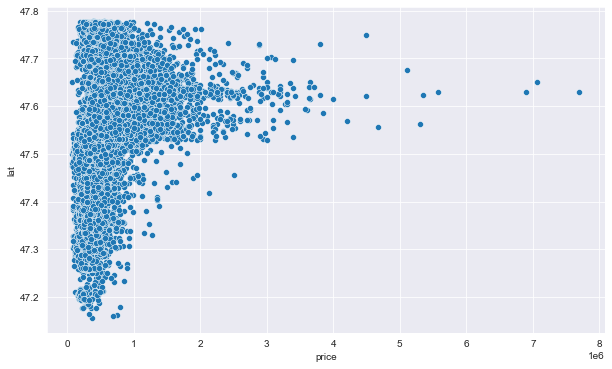

In [20]:
plt.figure(figsize = (10,6))
sns.scatterplot('price', 'lat', data = df)

The prices of houses are maximum in the latitude range of 47.6 to 47.7

### Longitude

<AxesSubplot:xlabel='price', ylabel='long'>

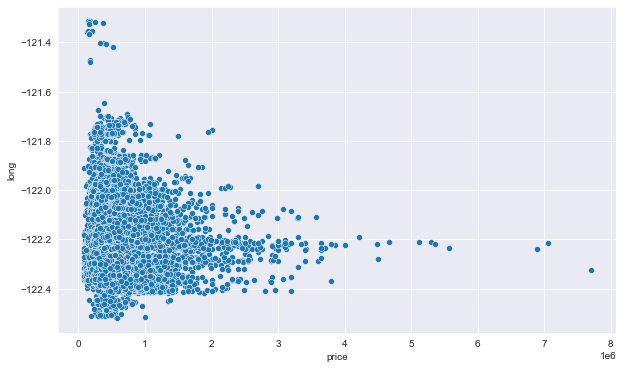

In [21]:
plt.figure(figsize = (10,6))
sns.scatterplot('price', 'long', data = df)

It looks like prices are higher in longitude range of -122.4 to -122.2 

### Combining lat and long

<AxesSubplot:xlabel='long', ylabel='lat'>

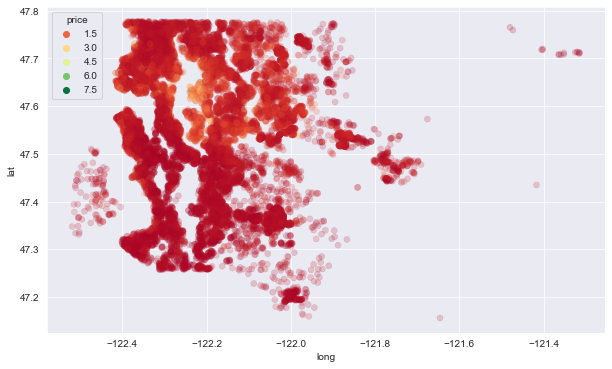

In [22]:
plt.figure(figsize = (10,6))
sns.scatterplot('long', 'lat', data = df, hue = 'price', palette = 'RdYlGn', edgecolor = None, alpha = 0.2)

We are not able to see much of a gradient in the plot, this may be due to the presence of expensive outliers in the data. We can remove those outliers and than plot again to see the gradient.

In [23]:
df.sort_values('price', ascending = False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [24]:
len(df)*0.01

215.97

Let's create another dataframe which does not contain top 1 percent houses.

In [25]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

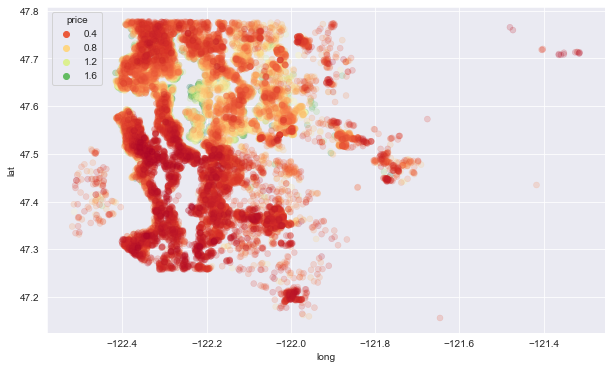

In [26]:
plt.figure(figsize = (10,6))
sns.scatterplot('long', 'lat', data = df.sort_values('price',ascending=False).iloc[216:]
                , hue = 'price', palette = 'RdYlGn', edgecolor = None, alpha = 0.2)

If we look closely we can conclude that houses near the water body have higher price. The blank portion near the green color is a lake in actual map of King County. 

### Handling Date

In [27]:
df['date'] = pd.to_datetime(df['date'])

In [28]:
df['month'] = df['date'].apply(lambda date: date.month)

In [29]:
df['year'] =df['date'].apply(lambda date: date.year)

<AxesSubplot:xlabel='year', ylabel='price'>

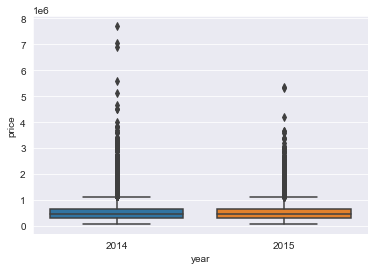

In [30]:
sns.boxplot(x = 'year', y = 'price', data = df)

<AxesSubplot:xlabel='month', ylabel='price'>

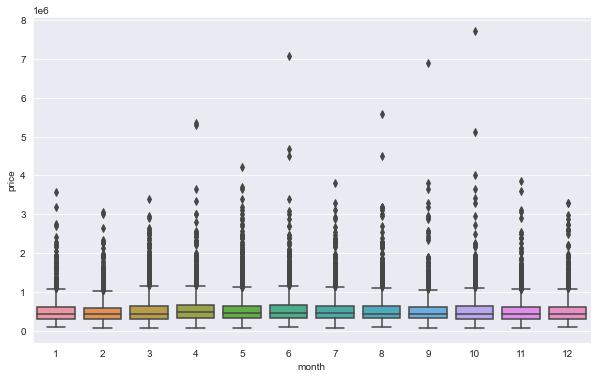

In [31]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'month', y = 'price', data = df)

<AxesSubplot:xlabel='month'>

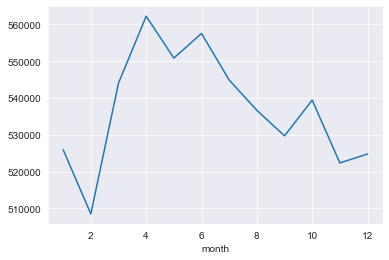

In [32]:
df.groupby('month').mean()['price'].plot()

People prefer to buy house in the month of April and June.

<AxesSubplot:xlabel='year'>

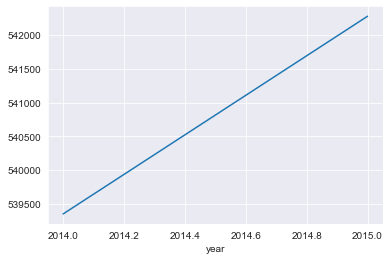

In [33]:
df.groupby('year').mean()['price'].plot()

In [34]:
df = df.drop('date', axis = 1)
df = df.drop('zipcode', axis = 1)
df = df.drop('id', axis = 1)

In [35]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


<AxesSubplot:>

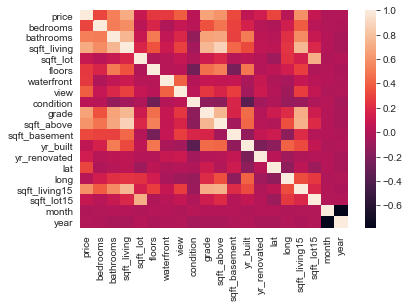

In [36]:
sns.heatmap(df.corr())

## Scaling and Train Test Split

In [37]:
X = df.drop('price', axis = 1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [38]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 1.Neural Network

In [39]:
model = Sequential()

In [40]:
model.add(Dense(32, activation= 'relu'))
model.add(Dense(16, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(4, activation= 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### 1.1 Training the Model

In [41]:
model.fit(x = X_train, y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 128, epochs = 100)

Train on 15117 samples, validate on 6480 samples
Epoch 1/100
15117/15117 [==============================] - 3s 174us/sample - loss: 430244404161.4775 - val_loss: 418956774564.3457
Epoch 2/100
15117/15117 [==============================] - 1s 56us/sample - loss: 430048924157.1212 - val_loss: 418429653710.0642
Epoch 3/100
15117/15117 [==============================] - 1s 55us/sample - loss: 428462002446.6823 - val_loss: 415146495261.7086
Epoch 4/100
15117/15117 [==============================] - 1s 56us/sample - loss: 421549308447.6677 - val_loss: 403290590695.9802
Epoch 5/100
15117/15117 [==============================] - 1s 57us/sample - loss: 401370717843.2969 - val_loss: 373091877713.5407
Epoch 6/100
15117/15117 [==============================] - 1s 56us/sample - loss: 357123007079.0638 - val_loss: 314678591609.3630
Epoch 7/100
15117/15117 [==============================] - 1s 57us/sample - loss: 284054680021.0201 - val_loss: 231388260225.5803
Epoch 8/100
15117/15117 [===============

15117/15117 [==============================] - 1s 53us/sample - loss: 46441597056.2286 - val_loss: 45147582888.7704
Epoch 65/100
15117/15117 [==============================] - 1s 53us/sample - loss: 46161474037.5344 - val_loss: 44897196957.3926
Epoch 66/100
15117/15117 [==============================] - 1s 54us/sample - loss: 45922612517.3746 - val_loss: 44646447452.9185
Epoch 67/100
15117/15117 [==============================] - 1s 53us/sample - loss: 45661972998.9432 - val_loss: 44409029214.8148
Epoch 68/100
15117/15117 [==============================] - 1s 55us/sample - loss: 45443988812.2564 - val_loss: 44178700303.1704
Epoch 69/100
15117/15117 [==============================] - 1s 52us/sample - loss: 45186619575.8418 - val_loss: 43960245614.6173
Epoch 70/100
15117/15117 [==============================] - 1s 55us/sample - loss: 44945929128.0079 - val_loss: 43839296013.9062
Epoch 71/100
15117/15117 [==============================] - 1s 55us/sample - loss: 44786395747.5414 - val_loss

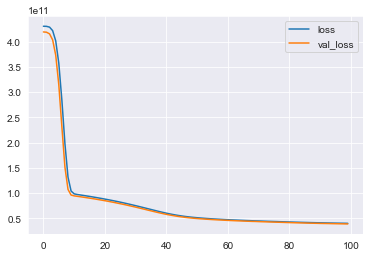

In [42]:
losses = pd.DataFrame(model.history.history)
losses.plot()
predictions = model.predict(X_test)

### 1.2 Evaluation on Test Data

In [43]:
print('The mean absolute error of the model is {mae:.2f} Dollars'.format(mae=mean_absolute_error(y_test, predictions)))
print('The root mean squared error of the model is {rmse:.2f} Dollars'.format(rmse=np.sqrt(mean_squared_error(y_test, predictions))))

The mean absolute error of the model is 120509.91 Dollars
The root mean squared error of the model is 197398.03 Dollars


<AxesSubplot:ylabel='Density'>

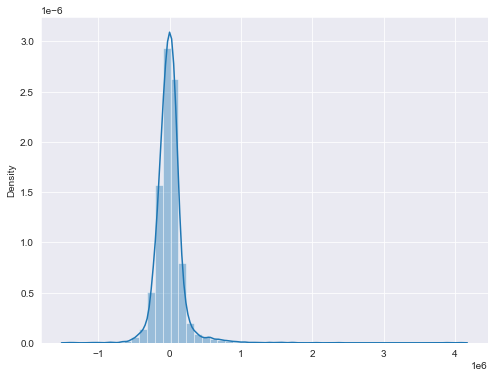

In [44]:
errors = y_test.values.reshape(6480, 1) - predictions
plt.figure(figsize = (8,6))
sns.distplot(errors)

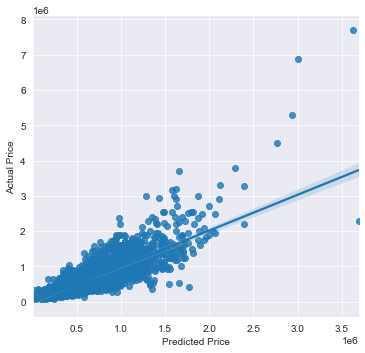

In [45]:
df_1 = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':predictions.reshape(6480,)})
sns.lmplot(x= 'Predicted Price', y = 'Actual Price', data = df_1)

### 1.3 Let's see our predictions on a single house from the dataset. 

In [46]:
house =  df.drop('price', axis = 1).iloc[32]
house = scaler.transform(house.values.reshape(-1,19))
house

array([[0.3       , 0.2       , 0.20268873, 0.00271377, 0.2       ,
        0.        , 0.        , 0.75      , 0.4       , 0.1517976 ,
        0.17012448, 0.25217391, 0.        , 0.84671063, 0.12541528,
        0.18258475, 0.00506255, 0.45454545, 0.        ]])

In [47]:
print('The price of the house predicted by the model is {price:.2f} Dollars'.format(price=model.predict(house)[0][0]))
print('The actual price of the house is {price:.2f} Dollars'.format(price=df['price'].iloc[32]))

The price of the house predicted by the model is 647753.31 Dollars
The actual price of the house is 687500.00 Dollars


##### Result: There is a difference of 31,001 Dollars in our prediction and actual price of the house using Neural Network.

.

## 2.Random Forest

In [48]:
rf = RandomForestRegressor(n_estimators = 200)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [49]:
print('The mean absolute error of the model is {mae:.2f} Dollars'.format(mae=mean_absolute_error(y_test, rf_pred)))
print('The root mean squared error of the model is {rmse:.2f} Dollars'.format(rmse=np.sqrt(mean_squared_error(y_test, rf_pred))))

The mean absolute error of the model is 67172.97 Dollars
The root mean squared error of the model is 125345.56 Dollars


<AxesSubplot:ylabel='Density'>

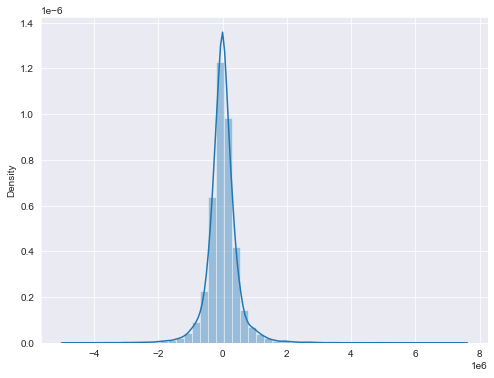

In [50]:
rf_error = y_test.values.reshape(6480, 1) - rf_pred
plt.figure(figsize = (8,6))
sns.distplot(rf_error)

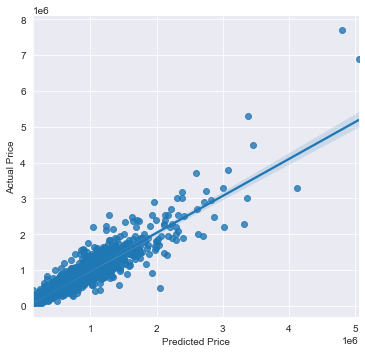

In [51]:
df_2 = pd.DataFrame({'Actual Price':y_test, 'Predicted Price':rf_pred})
sns.lmplot(x= 'Predicted Price', y = 'Actual Price', data = df_2)

### 2.1 Prediction on a single house from test data.

In [52]:
print('The price of the house predicted by the model is {price:.2f} Dollars'.format(price=rf.predict(house)[0]))
print('The actual price of the house is {price:.2f} Dollars'.format(price=df['price'].iloc[32]))

The price of the house predicted by the model is 683283.50 Dollars
The actual price of the house is 687500.00 Dollars


##### Result: There is a difference of 4,976 Dollars in our prediction and actual price of the house using Random Forest.